In [3]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from scipy.ndimage import gaussian_filter
from collections import defaultdict, OrderedDict

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 14, 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in', 'ytick.right': True, 'xtick.top':True,                  'ytick.major.size': 10, 'xtick.major.size': 10, 'legend.fancybox': True, 'legend.markerscale': 0.8, 'legend.handlelength': 5.0
                 #'axes.prop_cycle': cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
                 #'xtick.labelsize': 12,
                 #'ytick.labelsize': 12
                })

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(t, a, b, c):
    return a * (np.exp((400 - t) / b) - np.exp((400 - t) / c)) / (1 / b - 1 / c)
    #return a * (np.exp(t / b) - np.exp(t / c)) / (1 / b - 1 / c)

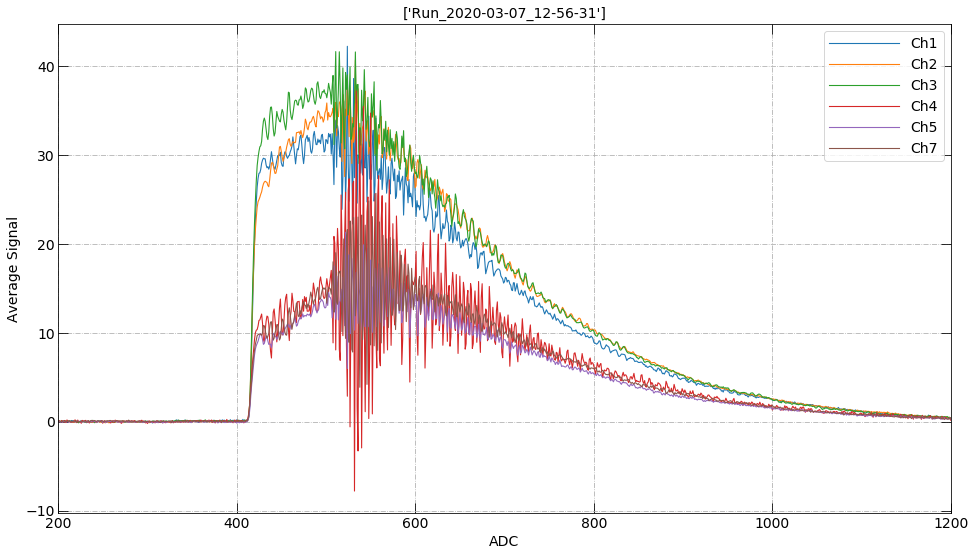

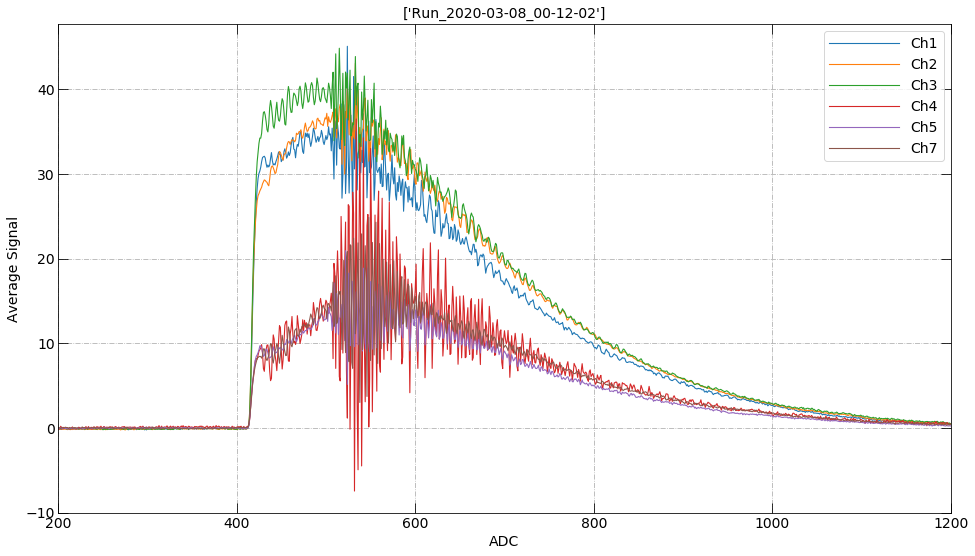

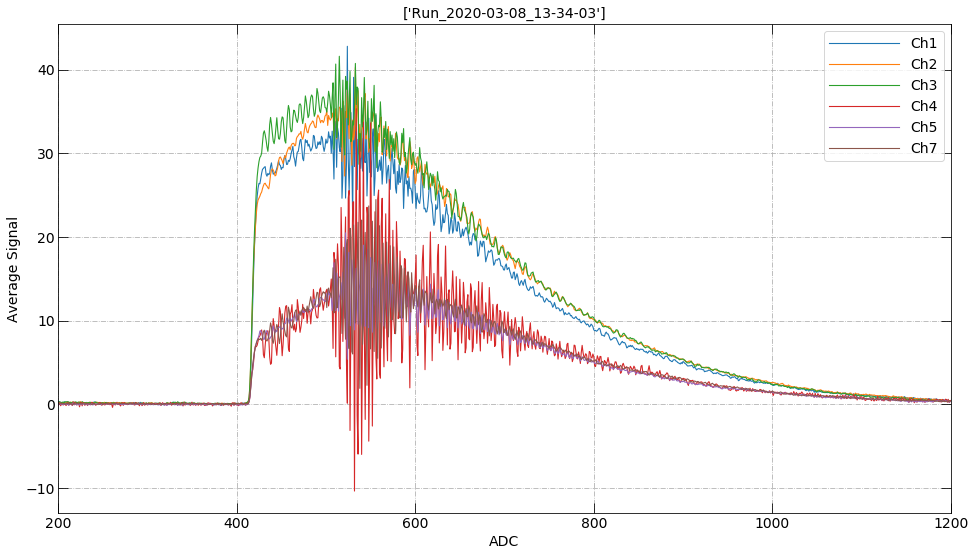

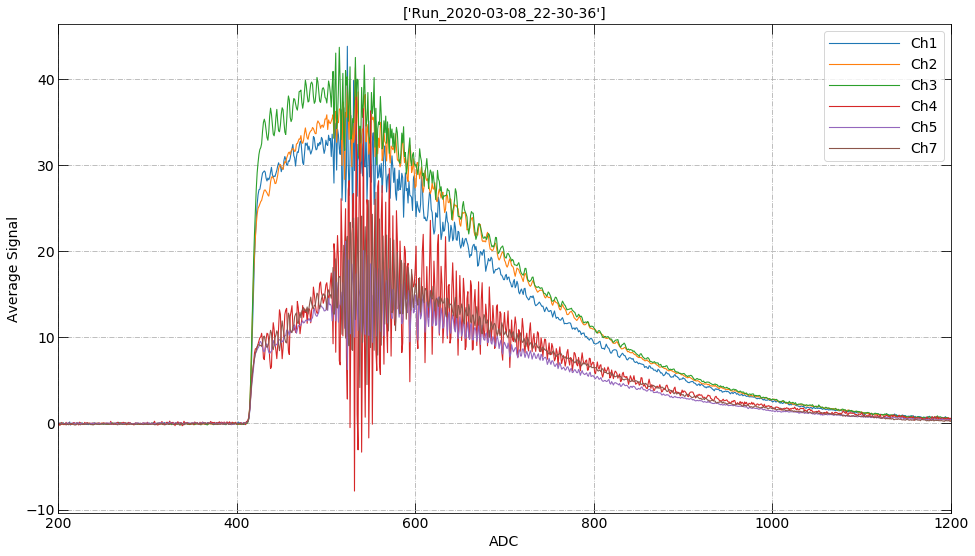

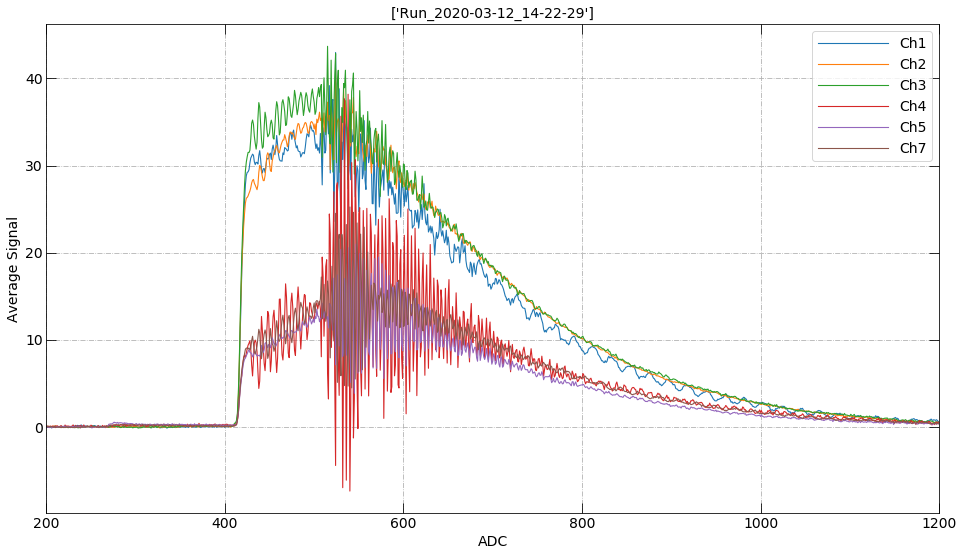

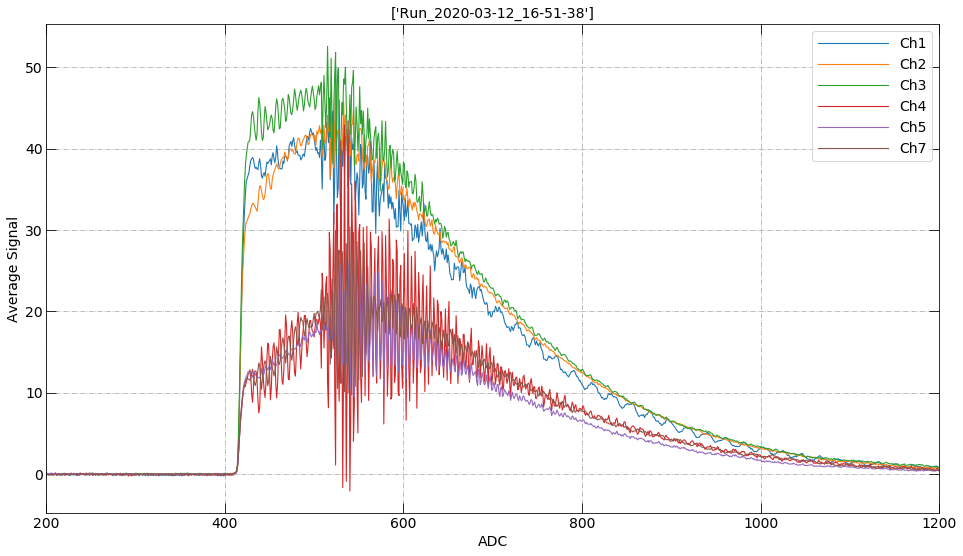

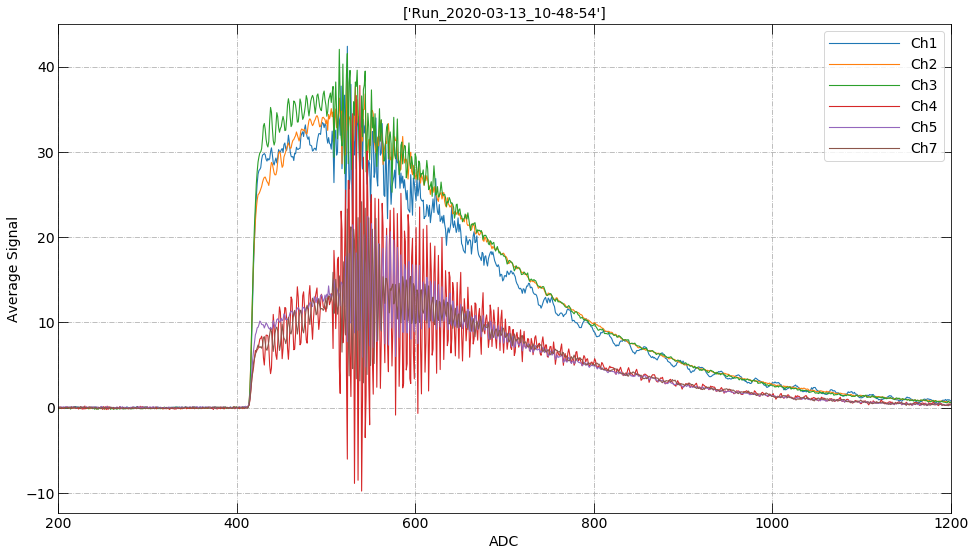

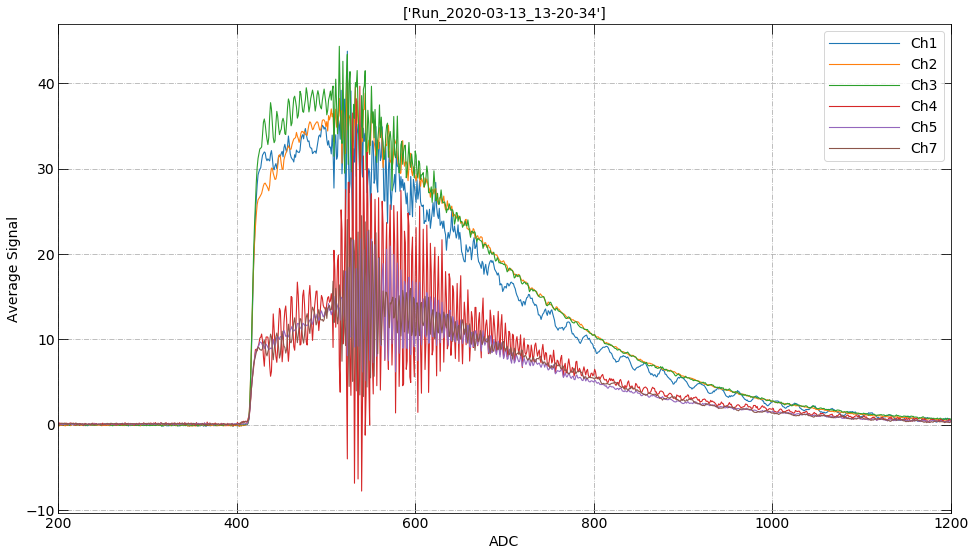

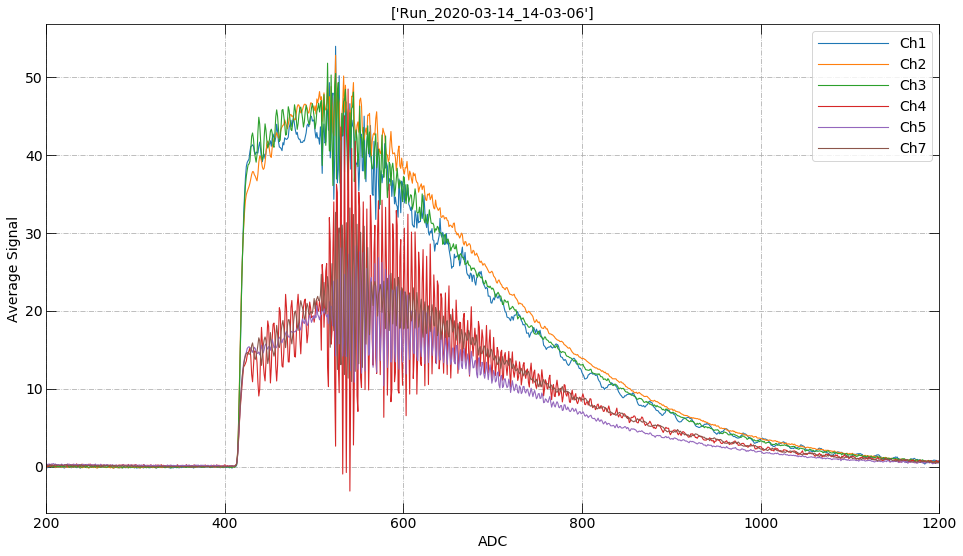

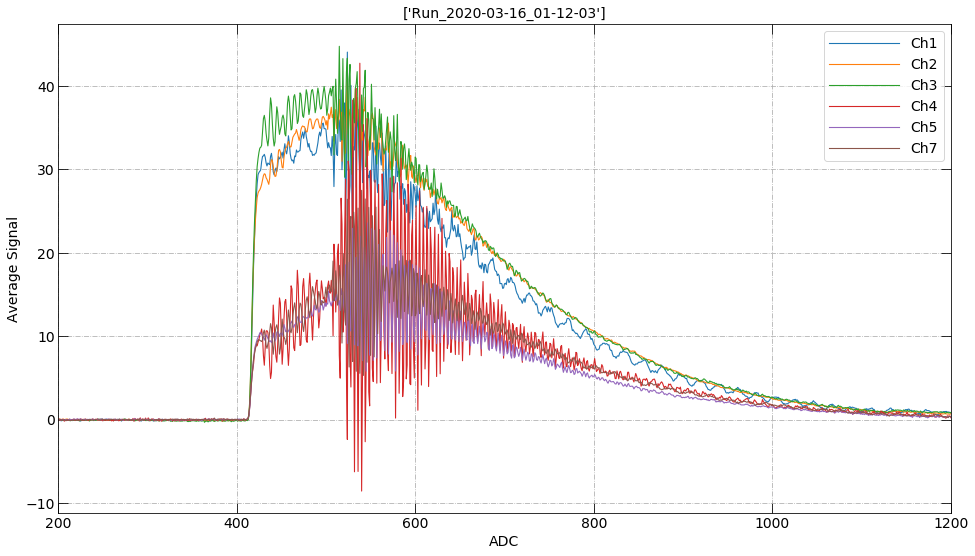

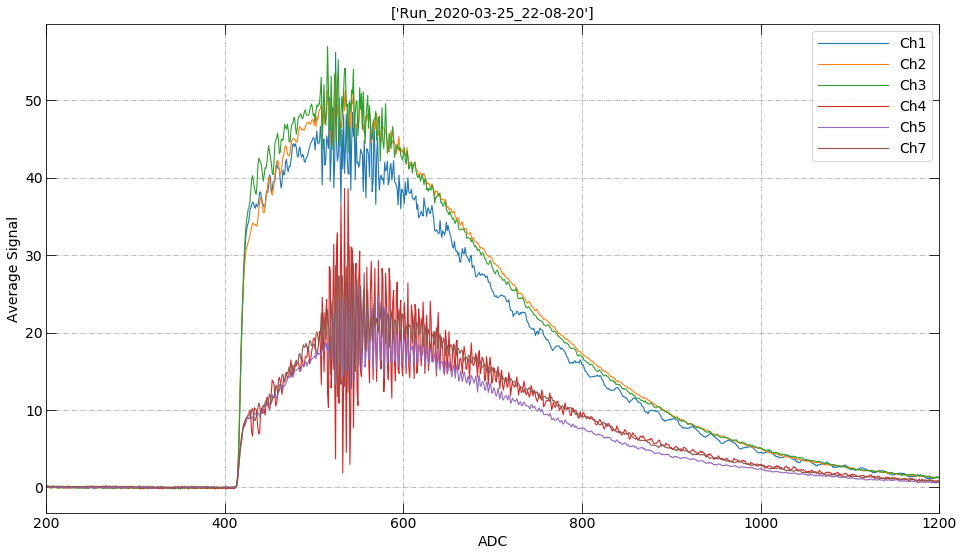

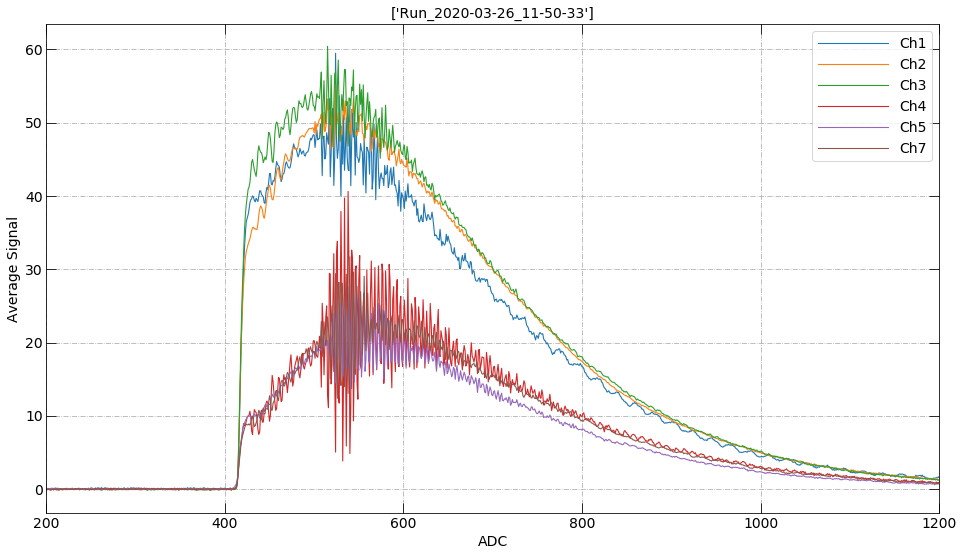

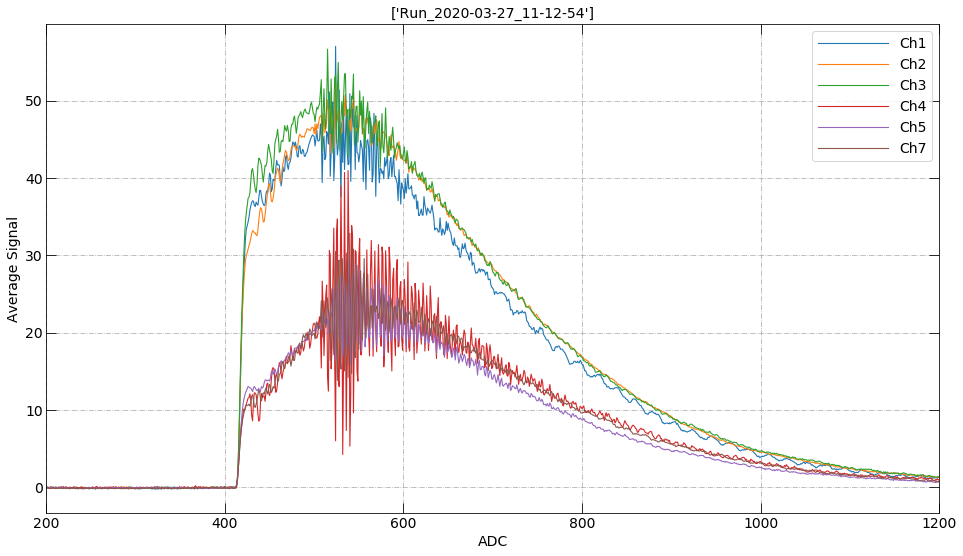

In [6]:
dirname = '/home/furkan/data/test_pods/'
Run = []
if not os.path.exists('run_by'):
    os.makedirs('run_by')

for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            #print(str(os.path.splitext(filename)[0]))
            Run = []
            Run: Run.append('Run_' +filename.split('.pkl')[0])
            #print(Run)
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            #pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            #mydata = pickle.load(pkl_file)

            dict_s ={}
            for key, value in mydata.items():
                #print(mydata[key].max(axis=0))
                channel=mydata[key]
                dict_s.update({key:channel})

            for key, value in dict_s.items():
                plt.plot(range(1, len(value) + 1), value, label=key, linewidth=1.1)
                # NOTE: changed `range(1, 4)` to mach actual values count
            plt.title(Run)
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plt.ticklabel_format(style='plain')
            #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
            plt.legend() 
            #plt.yscale('log')
            plt.xlim(200, 1200)
            #plt.ylim(-25, 80)
            #plt.xlim(300, 1500)

            #plot_path = os.path.abspath('run_by') 
            #plot_name = 'run_by'+str(filename.split('.pkl')[0])+'.png'
            #plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()


In [ ]:
dirname = '/home/furkan/data/pods/'
Run = []
if not os.path.exists('run_fit'):
    os.makedirs('run_fit')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            with open(dirname+filename,'rb') as fin:
                print(filename)
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # filtfilt
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                 


                dict_s.update({key:channel})
            
            no_window = np.mean([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
            dict_s.update({'no_window':no_window})
            Quarz = np.mean([dict_s['Ch4'], dict_s['Ch5'], dict_s['Ch7']], axis=0 )
            dict_s.update({'Quarz':Quarz})
            LAr = no_window - Quarz*1.25
            dict_s.update({'LAr':LAr})

            for key, value in dict_s.items():
                #if 'no_window'==key or 'Quarz'==key or 'LAr'==key:
                if 'LAr'==key:
                    y=value
                    t=np.arange(len(y))
                    x, flag = leastsq(residuals, x0, args=(y[550:1050:1], t[550:1050:1]))
                    for cof in x:
                        a=cof*6.7
                        #print("%.2f" % cof)
                        print('Tau2',"%.2f" % a)

            


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

In [ ]:
from pylab import *
from math import log
 
def fitExponent(tList,yList,ySS=0):
   '''
   This function finds a 
       tList in sec
       yList - measurements
       ySS - the steady state value of y
   returns
       amplitude of exponent
       tau - the time constant
   '''
   bList = [log(max(y-ySS,1e-6)) for y in yList]
   b = matrix(bList).T
   rows = [ [1,t] for t in tList]
   A = matrix(rows)
   #w = (pinv(A)*b)
   (w,residuals,rank,sing_vals) = lstsq(A,b)
   tau = -1.0/w[1,0]
   amplitude = exp(w[0,0])
   return (amplitude,tau)
 
if __name__=='__main__':
   import random
 
   tList = arange(0.0,1.0,0.001)
   tSamples = arange(0.0,1.0,0.2)
   random.seed(0.0)
   tau = 0.3
   amplitude = 3
   ySS = 3
   yList = amplitude*(exp(-tList/tau))+ySS
   ySamples = amplitude*(exp(-tSamples/tau))+ySS
   yMeasured = [y+random.normalvariate(0,0.05) for y in ySamples]
   #print yList
   (amplitudeEst,tauEst) = fitExponent(tSamples,yMeasured,ySS)
   print ('Amplitude estimate = %f, tau estimate = %f'
       % (amplitudeEst,tauEst))
        
   yEst = amplitudeEst*(exp(-tList/tauEst))+ySS
 
   figure(1)
   plot(tList,yList,'b')
   plot(tSamples,yMeasured,'+r',markersize=12,markeredgewidth=2)
   plot(tList,yEst,'--g')
   xlabel('seconds')
   legend(['True value','Measured values','Estimated value'])
   grid(True)
   show()